In [ ]:
# Insert project token here

# MARATONA BEHIND THE CODE 2020

## DESAFIO 7 - BanCoppel

<hr>

## Instalando Librerias

In [ ]:
!pip install scikit-learn --upgrade

In [ ]:
!pip install xgboost --upgrade

In [ ]:
!pip install imblearn --upgrade

<hr>

## Descargar los conjuntos de datos en formato .csv

In [581]:
import pandas as pd

In [648]:
#!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/training_dataset.csv
df_training_dataset = pd.read_csv(r'training_dataset.csv')
df_training_dataset.tail()

,ID,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,TARGET
23994,160,F,40.0,Soltero,Profesor,Sector privado,Iphone 6+,10.0,3.0,Si,31.0,0.0,0.0,0.0,31.0,Perfil_3
23995,155,F,24.0,NaN,Profesor,Institucion publica,L G,15.0,6.0,Si,30.0,30.0,31.0,30.0,7.0,Perfil_0
23996,229,F,24.0,Casado,Profesor,Desempleados,LG V10,5.0,3.0,Si,0.0,30.0,1.0,0.0,0.0,Perfil_4
23997,214,F,24.0,Soltero,Desempleados,Desempleados,Android,5.0,6.0,No,7.0,0.0,1.0,1.0,0.0,Perfil_4
23998,30,M,30.0,Casado,Servidor publico,Institucion publica,0,5.0,4.0,No,31.0,31.0,0.0,0.0,0.0,Perfil_3


In [649]:
df_training_dataset[df_training_dataset['ID']==160]

,ID,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,TARGET
6,160,M,50.0,Casado,Ingeniero de informacion,Institucion publica,General Mobile,5.0,3.0,Si,1.0,30.0,0.0,0.0,0.0,Perfil_4
612,160,M,30.0,Casado,Ingeniero biomedico,Institucion publica,Iphone,5.0,7.0,No,7.0,7.0,0.0,15.0,0.0,Perfil_4
622,160,F,40.0,Casado,Ingeniero de informacion,Institucion publica,Iphone 5S,15.0,3.0,Si,31.0,50.0,1.0,15.0,31.0,Perfil_0
935,160,M,50.0,Casado,Desempleados,Sector privado,Samsung,5.0,6.0,Si,4.0,0.0,1.0,0.0,4.0,Perfil_4
1060,160,F,30.0,Soltero,Desempleados,Sector privado,ASUS,5.0,3.0,Si,7.0,7.0,1.0,0.0,15.0,Perfil_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23122,160,M,35.0,Soltero,Ingeniero,Institucion publica,Samsung S3,0.0,4.0,No,0.0,31.0,1.0,0.0,0.0,Perfil_4
23309,160,F,30.0,Soltero,Ingeniero de informacion,Sector privado,Iphone 5S,5.0,3.0,No,31.0,7.0,1.0,0.0,1.0,Perfil_4
23764,160,F,35.0,NaN,Ingeniero de informacion,Institucion publica,NaN,5.0,3.0,Si,31.0,4.0,1.0,0.0,NaN,Perfil_5
23925,160,F,30.0,Casado,Desempleados,Sector privado,Xperia,0.0,3.0,Si,NaN,31.0,0.0,0.0,15.0,Perfil_5


Sobre el archivo "training_dataset.csv", temos alguna información sobre los usuarios de la app de BanCoppel:

**ID**

**Genero**

**Idade**

**Estado_civil**

**Trabajo**

**Sector**

**Telefono**

**Anos_usando_internet_banking**

**Anos_usando_banca_movil**

**Banca_movil_userfriendly**

**Frecuencia_internet_banking_mes**

**Frecuencia_banca_movil_mes**

**Frecuencia_pagamentos_tarjeta_mes**

**Frecuencia_tarjeta_virtual_mes**

**Frecuencia_saldo_cuenta_mes**

**TARGET**

In [650]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 23999 non-null  int64  
 1   Genero                             23110 non-null  object 
 2   Años                               23731 non-null  float64
 3   Estado_civil                       23295 non-null  object 
 4   Trabajo                            21044 non-null  object 
 5   Sector                             23640 non-null  object 
 6   Telefono                           22578 non-null  object 
 7   Anos_usando_internet_banking       23355 non-null  float64
 8   Anos_usando_banca_movil            22698 non-null  float64
 9   Banca_movil_userfriendly           23999 non-null  object 
 10  Frecuencia_internet_banking_mes    21275 non-null  float64
 11  Frecuencia_banca_movil_mes         22728 non-null  flo

In [651]:
df_training_dataset.nunique()

ID                                   250
Genero                                 3
Años                                   6
Estado_civil                           2
Trabajo                               31
Sector                                 4
Telefono                              73
Anos_usando_internet_banking           5
Anos_usando_banca_movil                6
Banca_movil_userfriendly               2
Frecuencia_internet_banking_mes        7
Frecuencia_banca_movil_mes             7
Frecuencia_pagamentos_tarjeta_mes      7
Frecuencia_tarjeta_virtual_mes         7
Frecuencia_saldo_cuenta_mes            8
TARGET                                 6
dtype: int64

In [652]:
df_training_dataset.Anos_usando_banca_movil.value_counts()

3.0    10967
6.0     3995
0.0     2822
4.0     2733
7.0     1785
5.0      396
Name: Anos_usando_banca_movil, dtype: int64

In [653]:
for j in df_training_dataset.iloc[:,10:-1].columns:
    #df_training_dataset[j]=df_training_dataset[j].replace(50,15)
    #df_training_dataset[j]=df_training_dataset[j].replace(35,30)
    df_training_dataset[j]=df_training_dataset[j].replace(31,30)
    #print(df_training_dataset[j].value_counts())


In [524]:
for j in df_training_dataset.iloc[:,10:-1].columns:
    df_training_dataset[j]=df_training_dataset[j].replace(4,2)
    df_training_dataset[j]=df_training_dataset[j].replace(7,3)
    df_training_dataset[j]=df_training_dataset[j].replace(15,4)
    df_training_dataset[j]=df_training_dataset[j].replace(30,5)
    df_training_dataset[j]=df_training_dataset[j].replace(50,7)
    df_training_dataset[j]=df_training_dataset[j].replace(35,6)

In [654]:
df_training_dataset['Banca_movil_userfriendly']=df_training_dataset['Banca_movil_userfriendly'].replace('Si',1)
df_training_dataset['Banca_movil_userfriendly']=df_training_dataset['Banca_movil_userfriendly'].replace('No',0)

In [655]:
df_training_dataset['Genero']=df_training_dataset['Genero'].replace('M',0)
df_training_dataset['Genero']=df_training_dataset['Genero'].replace('F',1)

In [656]:
df_training_dataset.Años.value_counts()

30.0    8546
35.0    4145
24.0    3728
40.0    2669
50.0    2399
45.0    2244
Name: Años, dtype: int64

In [657]:
df_training_dataset['Años']=df_training_dataset['Años'].replace(24,0)
df_training_dataset['Años']=df_training_dataset['Años'].replace(30,1)
df_training_dataset['Años']=df_training_dataset['Años'].replace(35,2)
df_training_dataset['Años']=df_training_dataset['Años'].replace(40,3)
df_training_dataset['Años']=df_training_dataset['Años'].replace(45,4)
df_training_dataset['Años']=df_training_dataset['Años'].replace(50,5)

In [658]:
df_training_dataset['Estado_civil']=df_training_dataset['Estado_civil'].replace('Casado',1)
df_training_dataset['Estado_civil']=df_training_dataset['Estado_civil'].replace('Soltero',0)

In [659]:
df_training_dataset.head()

,ID,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,TARGET
0,159,0,1.0,1.0,Profesor,Institucion publica,Samsung,0.0,6.0,1,50.0,0.0,1.0,0.0,30.0,Perfil_2
1,86,1,2.0,1.0,Profesor,Institucion publica,Samsung,5.0,3.0,0,30.0,4.0,30.0,0.0,30.0,Perfil_1
2,83,0,0.0,0.0,Servidor publico,Institucion publica,LeNovo A7000,0.0,3.0,1,50.0,30.0,15.0,1.0,15.0,Perfil_4
3,214,0,2.0,1.0,Ingeniero de informacion,Institucion publica,Samsung,5.0,3.0,0,30.0,7.0,30.0,0.0,30.0,Perfil_1
4,31,0,0.0,0.0,Ingeniero,Institucion publica,Samsung A6,6.0,0.0,0,4.0,NaN,1.0,15.0,1.0,Perfil_3


In [660]:
df_training_dataset[df_training_dataset['TARGET']=='Perfil_0']

,ID,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,TARGET
28,148,0,3.0,0.0,Servidor publico,Sector privado,Iphone 7,10.0,0.0,0,30.0,50.0,15.0,0.0,30.0,Perfil_0
29,28,0,2.0,1.0,Servidor publico,Institucion publica,LeNovo K5 Vibe,0.0,6.0,0,50.0,30.0,1.0,15.0,30.0,Perfil_0
33,187,0,1.0,1.0,Profesor,Institucion publica,Iphone,10.0,6.0,1,50.0,50.0,0.0,0.0,30.0,Perfil_0
66,154,0,1.0,1.0,Servidor publico,Selfemployed,Samsung,0.0,3.0,1,50.0,30.0,30.0,0.0,30.0,Perfil_0
143,221,0,0.0,1.0,Servidor publico,Institucion publica,NaN,NaN,NaN,1,NaN,7.0,15.0,NaN,4.0,Perfil_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23918,18,0,1.0,1.0,NaN,Sector privado,Samsung S7+,5.0,3.0,1,30.0,50.0,30.0,0.0,30.0,Perfil_0
23920,67,1,1.0,0.0,AlumNo,Sector privado,Iphone,10.0,4.0,1,0.0,7.0,15.0,0.0,30.0,Perfil_0
23932,206,0,2.0,0.0,Desempleados,Sector privado,LeNovo S1 Lite,5.0,6.0,1,0.0,30.0,0.0,0.0,7.0,Perfil_0
23940,57,0,5.0,1.0,NaN,Desempleados,LG G3,5.0,3.0,1,30.0,7.0,30.0,30.0,30.0,Perfil_0


Sector privado


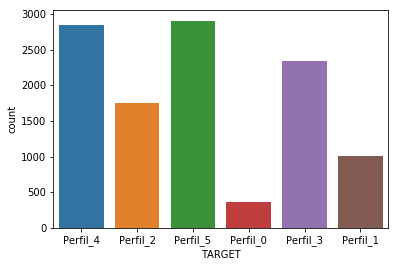

Institucion publica


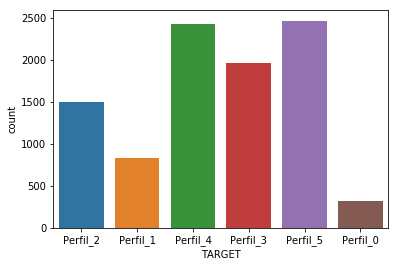

Desempleados


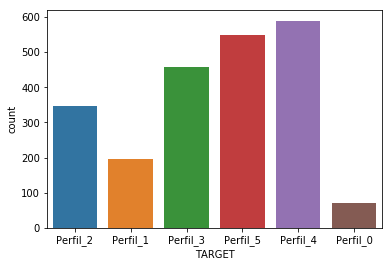

Selfemployed 


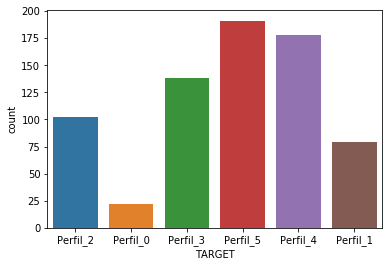

In [661]:
import seaborn as sns
import matplotlib.pyplot as plt
for j in df_training_dataset['Sector'].value_counts().index:
    print(j)
    #print(df_training_dataset[df_training_dataset['Sector']==j].TARGET.value_counts())
    sns.countplot(x="TARGET", data=df_training_dataset[df_training_dataset['Sector']==j])
    plt.show()

<hr>

## Desglose del desafío: clasificación multiclase

Este es un desafio cuyo objetivo de negocio es la segmentación de usuario de aplicativos de BanCopp. Podemos utilizar  dos enfoques: Machine Learning supervisado (clasificación) o no supervisado (clustering). En este desafío será usado la clasificación porque el conjunto de datos ya está disponible con "labels", o en otras palabras, ya con la variable objetivo. 

En la biblioteca scikit-learn tenemos diversos algoritmos para clasificación. El participante es libre para utilizar el framework que desee para completar este desafío.

En este notebook será mostrado un ejemplo usando el algoritmo "Decision Tree" para clasificar los estudantes en seis diferentes perfiles.

# ¡Atención!

La columna objetivo de este desafío es la columna ``TARGET``

<hr>

## Pre-procesando el dataset antes del entrenamiento

### Removiendo todas las lineas que poseen algun valor nulo en determinadas columnas

Usando el método Pandas **DataFrame.dropna()** usted puede remover todas las lineas nulas del dataset.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [376]:
# Mostrando los datos nulos del dataset antes de la primera transformación (df)
print("Valores nulos del df_training_dataset antes de la transformación DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset antes de la transformación DropNA: 

ID                                      0
Genero                                889
Años                                  268
Estado_civil                          704
Trabajo                              2955
Sector                                359
Telefono                             1421
Anos_usando_internet_banking          644
Anos_usando_banca_movil              1301
Banca_movil_userfriendly                0
Frecuencia_internet_banking_mes      2724
Frecuencia_banca_movil_mes           1271
Frecuencia_pagamentos_tarjeta_mes     285
Frecuencia_tarjeta_virtual_mes        475
Frecuencia_saldo_cuenta_mes           570
TARGET                                  0
dtype: int64



In [664]:
# Aplicando la función para borrar todas las lines con valore NaN en las siguientes columnas:
df_training_dataset = df_training_dataset.dropna(axis='index', how='any', subset=['Genero',  'Estado_civil', 'Sector'])

In [662]:
is_NaN = df_training_dataset.isnull()
row_has_NaN = is_NaN.any(axis=1)

In [663]:
df_training_dataset['nulos']=row_has_NaN.astype('int')

In [412]:
# # Mostrando los datos nulos del dataset despues de la primera transformación (df)
print("Valores nulos del df_training_dataset despues de la transformación DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset despues de la transformación DropNA: 

ID                                      0
Genero                                889
Años                                  268
Estado_civil                          704
Trabajo                              2955
Sector                                359
Telefono                             1421
Anos_usando_internet_banking          644
Anos_usando_banca_movil              1301
Banca_movil_userfriendly                0
Frecuencia_internet_banking_mes      2724
Frecuencia_banca_movil_mes           1271
Frecuencia_pagamentos_tarjeta_mes     285
Frecuencia_tarjeta_virtual_mes        475
Frecuencia_saldo_cuenta_mes           570
TARGET                                  0
nulos                                   0
dtype: int64



### Procesando valores NaN con SimpleImputer de sklearn

Para los valores NaN, usaremos a substituición por la constante 0 como **ejemplo**.

Usted puede escoger la estrategía que crea mejor para tratar los valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [665]:
df_training_dataset_rmcolumns = df_training_dataset.drop(columns=['ID', 'Trabajo', 'Sector', 'Telefono','Genero', 'Años', 'Estado_civil'], inplace=False)

In [666]:
df_training_dataset_rmcolumns.head()

,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,TARGET,nulos
0,0.0,6.0,1,50.0,0.0,1.0,0.0,30.0,Perfil_2,0
1,5.0,3.0,0,30.0,4.0,30.0,0.0,30.0,Perfil_1,0
2,0.0,3.0,1,50.0,30.0,15.0,1.0,15.0,Perfil_4,0
3,5.0,3.0,0,30.0,7.0,30.0,0.0,30.0,Perfil_1,0
4,6.0,0.0,0,4.0,NaN,1.0,15.0,1.0,Perfil_3,1


In [667]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [668]:
for j in df_training_dataset_rmcolumns.iloc[:,0:-1].columns:
    #impute_zeros.fit(X=df_training_dataset_rmcolumns[j])
    df_training_dataset_rmcolumns[j]=impute_zeros.fit_transform(X=df_training_dataset_rmcolumns[j].values.reshape(-1,1))[:,0]

In [123]:
impute_moda = SimpleImputer(
    missing_values=np.nan,
    strategy='median',
    verbose=0,
    copy=True
)

In [124]:
for j in df_training_dataset_rmcolumns.iloc[:,0:3].columns:
    #impute_zeros.fit(X=df_training_dataset_rmcolumns[j])
    df_training_dataset_rmcolumns[j]=impute_moda.fit_transform(X=df_training_dataset_rmcolumns[j].values.reshape(-1,1))[:,0]

In [679]:
df_training=df_training_dataset_rmcolumns.copy()

In [546]:
# Mostrando los datos nulos del dataset antes de la segunda transformación (df)
print("Valores nulos del df_training_dataset antes de la transformación SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

# Aplicando la transformación ``SimpleImputer`` en conjunto de datos base
impute_zeros.fit(X=df_training_dataset)

# Reconstruyendo un Pandas DataFrame con los resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Mostrando los datos nulos del dataset despues de la segunda transformación (df)
print("Valores nulos del df_training_dataset despues de la transformación SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset antes de la transformación SimpleImputer: 

ID                                      0
Genero                                889
Años                                  268
Estado_civil                          704
Trabajo                              2955
Sector                                359
Telefono                             1421
Anos_usando_internet_banking          644
Anos_usando_banca_movil              1301
Banca_movil_userfriendly                0
Frecuencia_internet_banking_mes      2724
Frecuencia_banca_movil_mes           1271
Frecuencia_pagamentos_tarjeta_mes     285
Frecuencia_tarjeta_virtual_mes        475
Frecuencia_saldo_cuenta_mes           570
TARGET                                  0
dtype: int64

Valores nulos del df_training_dataset despues de la transformación SimpleImputer: 

ID                                   0
Genero                               0
Años                                 0
Estado_civil                   

### Eliminando colunas no desadas

Vamos  **demonstrar** abajo como usar el método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [579]:
df_training_dataset_rmcolumns.tail()

,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,TARGET,nulos
23994,10.0,3.0,1,30.0,0.0,0.0,0.0,30.0,Perfil_3,0
23995,15.0,6.0,1,30.0,30.0,30.0,30.0,7.0,Perfil_0,1
23996,5.0,3.0,1,0.0,30.0,1.0,0.0,0.0,Perfil_4,0
23997,5.0,6.0,0,7.0,0.0,1.0,1.0,0.0,Perfil_4,0
23998,5.0,4.0,0,30.0,30.0,0.0,0.0,0.0,Perfil_3,0


# ¡Atención!

Las columnas removidas anteriores son solo por ejemplo, puede usar las columnas que desee e incluso crear nuevas columnas con datos que crea que son importantes.

### Tratamiento de variables categóricas

Como mencionado antes, los computadores no son buenos con variables "categóricas" (strings).

Dado una columna con variable categórica, lo que podemos realizar es la codificación de esa columna en multiples columnas contiendo variables binárias. Este proceso es llamado "one-hot-encoding" o "dummy encoding". Si usted no esta familiarizado con estos terminos, usted puede buscar mas sobre estos en internet :)

In [580]:
# Tratando variables categóricas con el método Pandas ``get_dummies()''
df_training = pd.get_dummies(df_training_dataset_rmcolumns, columns=['Banca_movil_userfriendly'])
df_training.tail()

,Anos_usando_internet_banking,Anos_usando_banca_movil,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,TARGET,nulos,Banca_movil_userfriendly_0,Banca_movil_userfriendly_1
23994,10.0,3.0,30.0,0.0,0.0,0.0,30.0,Perfil_3,0,0,1
23995,15.0,6.0,30.0,30.0,30.0,30.0,7.0,Perfil_0,1,0,1
23996,5.0,3.0,0.0,30.0,1.0,0.0,0.0,Perfil_4,0,0,1
23997,5.0,6.0,7.0,0.0,1.0,1.0,0.0,Perfil_4,0,1,0
23998,5.0,4.0,30.0,30.0,0.0,0.0,0.0,Perfil_3,0,1,0


In [680]:
#df_training['banking']=df_training.Anos_usando_internet_banking*df_training.Frecuencia_internet_banking_mes
#df_training['banca_movil']=df_training.Anos_usando_banca_movil*df_training.Frecuencia_banca_movil_mes
#df_training['ratio']=df_training.Frecuencia_banca_movil_mes*df_training.Frecuencia_saldo_cuenta_mes
df_training['ratio2']=df_training.Frecuencia_banca_movil_mes+df_training.Frecuencia_saldo_cuenta_mes+df_training.Frecuencia_internet_banking_mes

In [619]:
df_training.head()

,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,TARGET,nulos,banking,banca_movil,ratio,ratio2
0,0.0,6.0,1,50.0,0.0,1.0,0.0,30.0,Perfil_2,0,0.0,0.0,0.0,80.0
1,5.0,3.0,0,30.0,4.0,30.0,0.0,30.0,Perfil_1,0,150.0,12.0,120.0,64.0
2,0.0,3.0,1,50.0,30.0,15.0,1.0,15.0,Perfil_4,0,0.0,90.0,450.0,95.0
3,5.0,3.0,0,30.0,7.0,30.0,0.0,30.0,Perfil_1,0,150.0,21.0,210.0,67.0
4,6.0,0.0,0,4.0,0.0,1.0,15.0,1.0,Perfil_3,1,24.0,0.0,0.0,5.0


# ¡Atención!

La columna **TARGET** debe ser mantenida como una string. Usted no necesita procesar/codificar la variable objetivo.

<hr>

## Entrenando un clasificador con base en un árbol de decisión

### Selecionando FEATURES y definiendo la variable TARGET

In [681]:
columnas=[x for x in df_training.columns if x not in ['TARGET']]
features = df_training[columnas]
target = df_training['TARGET']  ## No cambie esta variable

In [682]:
target.shape

(22108,)

### Dividiendo el conjunto de datos en conjuntos de entrenamiento y pruebas

In [683]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=133,stratify=target)

In [454]:
from sklearn.utils import resample
new=pd.concat([X_train,y_train],axis=1)
perfil_0=new[new.TARGET=='Perfil_0']
perfiles=new[new.TARGET!='Perfil_0']
us = resample(perfil_0,
                          replace=True, # sample with replacement
                          n_samples=len(perfil_0)*2, # match number in majority class
                          random_state=27)
new2=pd.concat([us,perfiles],axis=0).sample(frac=1)
X_train=new2.iloc[:,0:-1]
y_train=new2.iloc[:,-1]

In [684]:
X_train=X_train.astype('int')
X_test=X_test.astype('int')

In [327]:
from imblearn.over_sampling import SMOTE
ib=SMOTE(random_state=123)
X_train, y_train = ib.fit_resample(X_train, y_train)
X_train=pd.DataFrame(data=X_train,columns=columnas)

In [422]:
pd.Series(y_train).value_counts()

Perfil_5    4164
Perfil_4    4103
Perfil_3    3335
Perfil_2    2520
Perfil_1    1436
Perfil_0    1042
Name: TARGET, dtype: int64

### Entrenando un árbol de decisión

In [693]:
# Método para creacion de modelos basados en arbol de desición
columnas_cat=['Banca_movil_userfriendly','nulos']
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
dtc=lgb.LGBMClassifier(n_estimators=100,learning_rate=0.1,max_depth=9,objective='multiclass',metric='multi_logloss',num_class=6).fit(X_train,y_train)
#dtc=CatBoostClassifier(cat_features=columnas_cat,num_trees=1200,max_depth=8).fit(X_train,y_train)
#dtc = DecisionTreeClassifier(max_depth=15).fit(X_train, y_train)

In [689]:
g={'n_estimators':[100,500,200,700,1000],
   'max_depth':[3,6,9,12],
   'learning_rate':[0.5,0.3,0.1,0.01]
}
from sklearn.model_selection import GridSearchCV
dtc=lgb.LGBMClassifier()
gs=GridSearchCV(estimator=dtc,
             param_grid=g)
dtc=gs.fit(X_train,y_train)
print(dtc.best_params_)
dtc=dtc.best_estimator_
dtc.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100}


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=9,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### Haciendo predicciones en la muestra de prueba

In [690]:
y_pred = dtc.predict(X_test)
print(y_pred)

['Perfil_1' 'Perfil_5' 'Perfil_5' ... 'Perfil_3' 'Perfil_5' 'Perfil_5']


### Analizando la calidad del modelo a través de la matriz de confusión

In [691]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

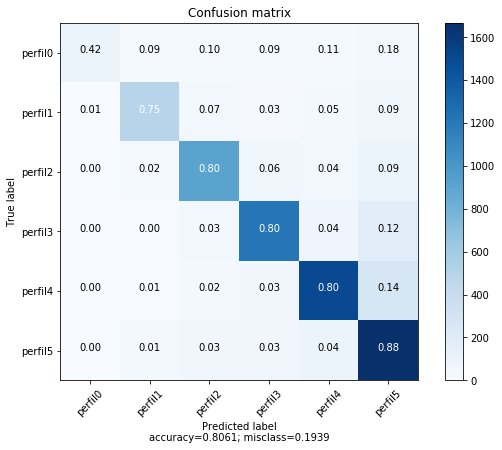

In [692]:
from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['perfil0', 'perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5'])

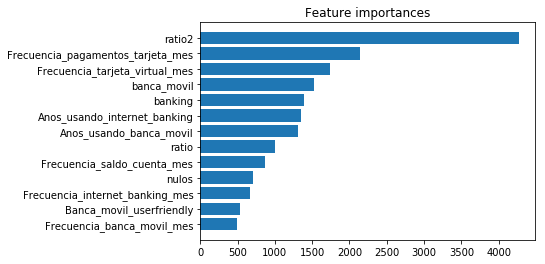

In [635]:
importances = dtc.feature_importances_
indices = np.argsort(importances)
plt.figure()
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]), importances[indices],
       align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.ylim([-1, X_train.shape[1]])
plt.show()

<hr>

## Scoring de los datos necesarios para entregar la solución

Como entrega de su solución, esperamos los resultados clasificados del seguiente dataset llamado "to_be_scored.csv":

### Download la "Hoja de evaluación"

In [ ]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

# ¡Atención!

El dataframe ``to_be_scored`` en su "hoja de evaluación". Note que la columna "categoria" no existe en esta muetra, por lo que no puede ser utilizada para entrenar modelos supervisados

In [ ]:
df_to_be_scored.info()

<hr>

# ¡Atención!

# Para poder aplicar su modelo y clasificar la hoja de evaluación, usted debe aplicar primero todas las transformaciones de columna que usted aplico en el dataset de entrenamiento.

# No remueva o adicione filas en la hoja de evaluación. 

# No altere el orden de las filas en la hoja de evaluación. 

# Al final, las 1000 entradas deben estar clasificadas, con los valores calculados en una columna llamada "target"

<hr>

En la celda de abajo, repetimos rapidamente los mismos pasos de pré-procesamiento usados en el ejemplo dado con árbol de decisión

In [ ]:
# 1 - Removiendo filas con valores NaN 
df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['Genero', 'Años', 'Estado_civil', 'Trabajo', 'Sector', 'Telefono', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil', 'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes', 'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes', 'Frecuencia_saldo_cuenta_mes'])

# 2 - Reemplazando con ceros los valores faltantes
impute_zeros.fit(X=df_to_be_scored_1)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored_1
    ),
    columns=df_to_be_scored_1.columns
)

# 3 - Remoción de columnas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['ID', 'Genero', 'Estado_civil', 'Trabajo', 'Sector', 'Telefono'], inplace=False)

# 4 - Encoding con "dummy variables"
df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['Banca_movil_userfriendly'])

df_to_be_scored_4.tail()

<hr>

Puede verificar abajo que las columnas de la hoja de evaluación son identicas a las usadas para entrenar el modelo:

In [ ]:
df_training[
    [
        'Años', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil',
       'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes',
       'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes',
       'Frecuencia_saldo_cuenta_mes', 'Banca_movil_userfriendly_No',
       'Banca_movil_userfriendly_Si'
    ]
].columns

In [ ]:
df_to_be_scored_4.columns

# Atención

Para todas las columnas que no existiren en "df_to_be_scored", usted puede usar la tecnica de abajo para adicionarla:

In [ ]:
df_to_be_scored_4['Banca_movil_userfriendly_No'] = 0

In [ ]:
y_pred = dtc.predict(df_to_be_scored_4)
df_to_be_scored_4['TARGET'] = y_pred
df_to_be_scored_4.tail()

### Guardando la hoja de evaluacion como un archivo .csv para ser enviado
**SI YA TIENE UN DATA ASSET CON EL NOMBRE results.csv EN ESTE PROYECTO O EN OTRO PROYECTO DE WATSON STUDIO DEBE BORRAR EL ARCHIVO ANTES DE CORRER LA SIGUIENTE CELDA O TENDRA EL ERROR: _RuntimeError: File 'results.csv' already exists in storage._**

In [ ]:
project.save_data(file_name="results.csv", data=df_to_be_scored_4.to_csv(index=False))

# ATENCIÓN

# La ejecución de la celda anterior creará un nuevo "data asset" en su proyecto de Watson Studio. Deberá descargar este archivo junto con este cuaderno y crear un archivo zip con results.csv y notebook.ipynb para enviarlo. (los archivos deben tener este nombre)

<hr>

## ¡Felicitaciones!
Si ya está satisfecho con su solución, vaya a la página siguiente y envíe los archivos necesarios para su envío.

# https://bancoppel.maratona.dev
